In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV




import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

# Data Exploration

In [83]:
data=pd.read_csv('public_dat/store_train.csv', sep =' ', header=None)
featureNames = ["shopID","dayOfWeek","date","visitNumber","open","promo","stateHoliday","schoolHoliday"]
data.columns = featureNames

target = pd.read_csv('public_dat/store_train_solution.csv', sep=' ', header=None)

data["year"] = data["date"].map(lambda x : int(x[:4]))
data["month"] = data["date"].map(lambda x : int(x[5:7]))
data["day"] = data["date"].map(lambda x : int(x[8:]))

del data["stateHoliday"]
del data["shopID"]
del data["date"]

data["target"]=target

data["relativeDay"]=data["day"]+(data["month"]-1)*30+(data["year"]-2013)*365





dayOfWeek        2.671179
visitNumber      2.671179
open             2.671179
promo            2.671179
schoolHoliday    2.671179
year             2.671179
month            2.671179
day              2.671179
target           2.671179
relativeDay      2.671179
dtype: float64


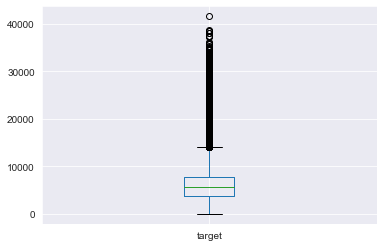

In [84]:
data.boxplot(column="target")



print(data[data["target"]>14000].count()/data.count()*100)
data.drop(data.index[data['target'] >14000], inplace = True)


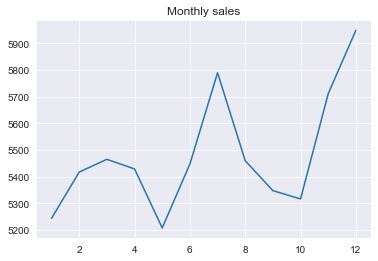

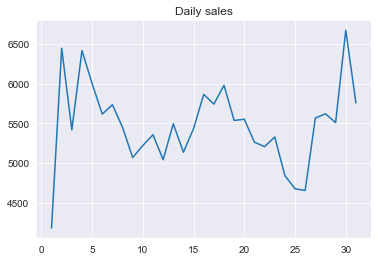

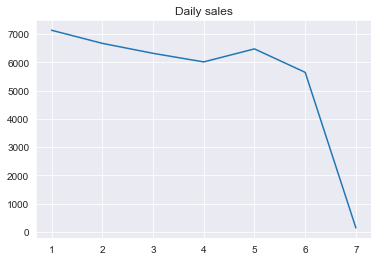

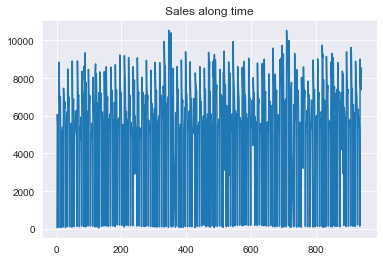

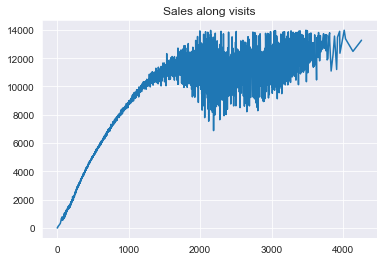

In [85]:
sales_by_month = data.groupby('month').mean()
plt.plot(sales_by_month["target"])
plt.title("Monthly sales")
plt.show()

sales_by_day = data.groupby('day').mean()
plt.plot(sales_by_day["target"])
plt.title("Daily sales")
plt.show()

sales_by_day_of_week = data.groupby('dayOfWeek').mean()
plt.plot(sales_by_day_of_week["target"])
plt.title("Daily sales")
plt.show()




sales_along_time = data.groupby('relativeDay').mean()
plt.plot(sales_along_time["target"])
plt.title("Sales along time")
plt.show()



sales_along_visits = data.groupby('visitNumber').mean()
plt.plot(sales_along_visits["target"])
plt.title("Sales along visits")
plt.show()



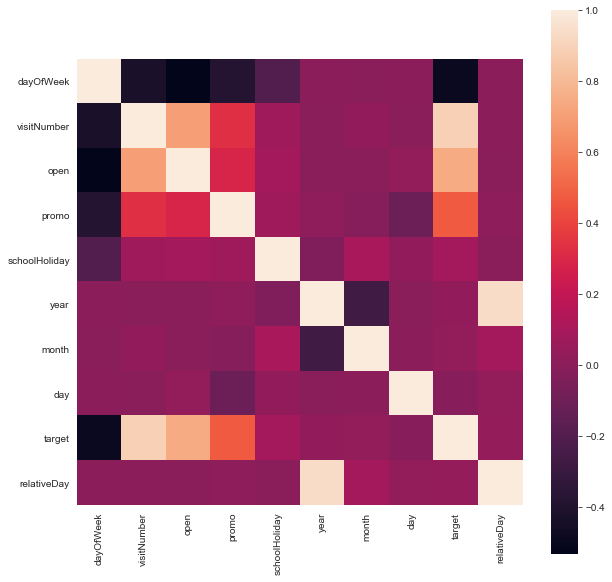

In [86]:
cormat=data.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cormat,square=True)

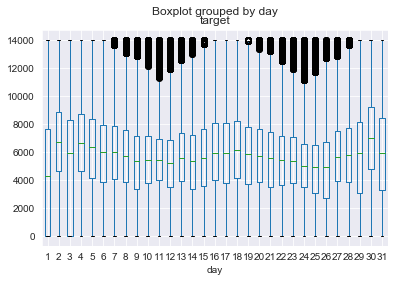

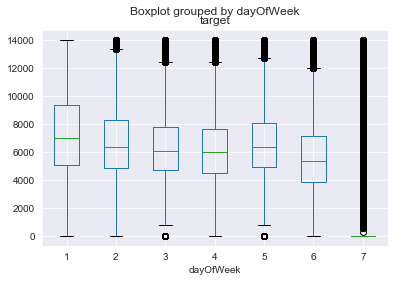

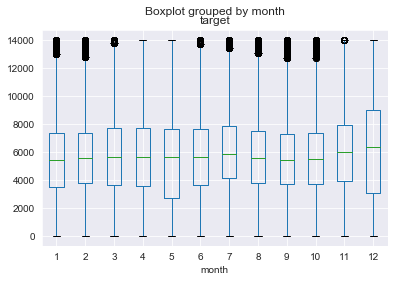

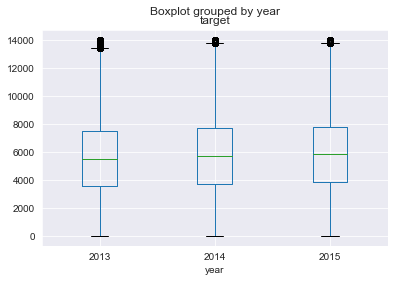

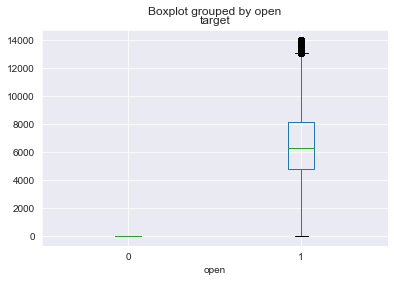

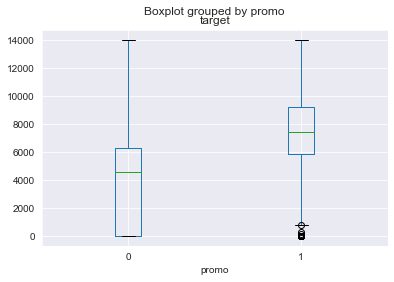

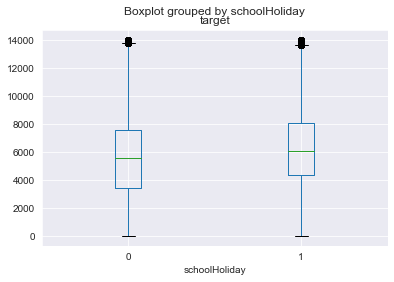

In [87]:
data.boxplot(column="target", by="day")
data.boxplot(column="target", by="dayOfWeek")
data.boxplot(column="target", by="month")
data.boxplot(column="target", by="year")
data.boxplot(column="target", by="open")
data.boxplot(column="target", by="promo")
data.boxplot(column="target", by="schoolHoliday")



In [88]:
target= data["target"]


del data["target"]

data.head()

,dayOfWeek,visitNumber,open,promo,schoolHoliday,year,month,day,relativeDay
0,3,641,1,1,0,2013,11,6,306
1,2,877,1,1,1,2013,7,16,196
2,4,561,1,1,0,2014,1,23,388
3,4,1584,1,1,0,2013,9,26,266
4,3,1477,1,1,0,2014,1,22,387


# Regression

In [95]:
regression_data=pd.DataFrame()
regression_data=data




regression_data["dayOfWeek"]=pd.Categorical(regression_data["dayOfWeek"],ordered=False)
regression_data["year"]=pd.Categorical(regression_data["year"],ordered=False)
regression_data["month"]=pd.Categorical(regression_data["month"],ordered=False)
regression_data["day"]=pd.Categorical(regression_data["day"],ordered=False)




trainDataDummies=pd.get_dummies(regression_data[["dayOfWeek","year","month","day"]])


regression_data=pd.concat([regression_data,trainDataDummies],axis=1)

X_train, X_test, y_train, y_test = train_test_split(regression_data, target, test_size=0.33, random_state=42)



regLasso = linear_model.Lasso()


regLasso = linear_model.Lasso()
regLasso.fit(X_train,y_train)


prev=regLasso.predict(X_test)
print("MSE=",mean_squared_error(y_test,prev))



MSE= 1623516.248930531


In [100]:

grid_params={'alpha':[0,0.1,0.5,1],'normalize':[True, False]}
regLasso = linear_model.Lasso()

gLasso = GridSearchCV(
        estimator= regLasso,
        param_grid=grid_params,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)


grid_result = gLasso.fit(X_train,y_train)





/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:741: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376269776614.9772, tolerance: 525202553.43795335
  positive)


In [102]:
results=grid_result.best_params_
results


{'alpha': 0, 'normalize': True}

Best params: alpha=0, normalize= True

In [103]:
grid_result.best_score_

-1621143.908574372

In [106]:
estimator=grid_result.best_estimator_
prev=estimator.predict(X_test)
print("MSE=",mean_squared_error(y_test,prev))

MSE= 1621989.4693641034


In [122]:
submission_data=pd.read_csv('public_dat/store_test.csv', sep =' ', header=None)
submission_data.columns = featureNames


submission_data["year"] = submission_data["date"].map(lambda x : int(x[:4]))
submission_data["month"] = submission_data["date"].map(lambda x : int(x[5:7]))
submission_data["day"] = submission_data["date"].map(lambda x : int(x[8:]))

del submission_data["stateHoliday"]
del submission_data["shopID"]
del submission_data["date"]


submission_data["relativeDay"]=submission_data["day"]+(submission_data["month"]-1)*30+(submission_data["year"]-2013)*365
submission_data.head()



submission_data["dayOfWeek"]=pd.Categorical(submission_data["dayOfWeek"],ordered=False)
submission_data["year"]=pd.Categorical(submission_data["year"],ordered=False)
submission_data["month"]=pd.Categorical(submission_data["month"],ordered=False)
submission_data["day"]=pd.Categorical(submission_data["day"],ordered=False)




trainDataDummies=pd.get_dummies(submission_data[["dayOfWeek","year","month","day"]])


submission_data=pd.concat([submission_data,trainDataDummies],axis=1)

submission_data.head()


sub = pd.DataFrame()
sub["result"]=estimator.predict(submission_data)
sub.head()

sub = sub.where(sub["result"] > 0, 0)



sub.to_csv("Lasso_regression.csv",index=False,header=False)

# Neural Nets

In [36]:
from sklearn.neural_network import MLPRegressor

mlp=MLPRegressor(hidden_layer_sizes=(100,),alpha=1e-4,learning_rate_init=0.001,verbose=10,tol=0.00001,solver='adam',activation="relu")


mlp.fit(trainData.head(10), Ytrain.head(10))
#print("score:",mlp.score(train_x_clean,train_y_clean))
print('current loss computed with the loss function: ',mlp.loss_)



print(' number of iterations for the solver: ', mlp.n_iter_)
print('num of layers: ', mlp.n_layers_)



mlp_predict=mlp.predict(trainData.head(10))

mlp_predict

Iteration 1, loss = 25957597.66132016
Iteration 2, loss = 25725386.32242757
Iteration 3, loss = 25494447.37254857
Iteration 4, loss = 25265212.75334941
Iteration 5, loss = 25037448.63459640
Iteration 6, loss = 24810949.19475904
Iteration 7, loss = 24585740.47910914
Iteration 8, loss = 24362234.47569824
Iteration 9, loss = 24139719.56855625
Iteration 10, loss = 23917531.92058768
Iteration 11, loss = 23696523.82038603
Iteration 12, loss = 23476931.39682653
Iteration 13, loss = 23258951.94309924
Iteration 14, loss = 23042760.72272765
Iteration 15, loss = 22827796.27630014
Iteration 16, loss = 22613662.46564778
Iteration 17, loss = 22401108.59531267
Iteration 18, loss = 22190318.73383483
Iteration 19, loss = 21980286.07291859
Iteration 20, loss = 21771290.15319832
Iteration 21, loss = 21562937.64775959
Iteration 22, loss = 21355498.24608044
Iteration 23, loss = 21148509.63408227
Iteration 24, loss = 20942100.02506442
Iteration 25, loss = 20735748.30006126
Iteration 26, loss = 20528773.5412

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([6322.36756512, 6611.9354643 , 6310.70951522, 8162.94193873,
       8141.89883674, 7366.9972505 , 6350.61605721, 6443.23725967,
       6464.10418515, 6075.1479196 ])

In [38]:
Ytrain.head(10)

0      7293
1      7060
2      4565
3      6380
4     11647
5      7967
6      7101
8      7516
9      6295
10     3511
Name: target, dtype: int64

# KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor



knn = KNeighborsRegressor()
knn.fit(trainData, Ytrain)
knn_pred = knn.predict(trainData)

print("MSE=",mean_squared_error(Ytrain,knn_pred))


grid_params={'n_neighbors':[5], 'metric':['euclidean','manhattan'] }

MSE= 1048985.5461311825


In [36]:


knn = KNeighborsRegressor()

gsc = GridSearchCV(
        estimator= knn,
        param_grid=grid_params,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(trainData,Ytrain)





In [42]:
results=grid_result.best_params_
results

{'metric': 'manhattan', 'n_neighbors': 5}

# Decision Trees

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(min_samples_split=2)
dt = tree.fit(trainData, Ytrain)
y_pred = tree.predict(trainData)

print("MSE=",mean_squared_error(Ytrain,y_pred))

MSE= 348489.96034387697


# SVM

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
dt = forest.fit(trainData, Ytrain)
y_pred = forest.predict(trainData)

print("MSE=",mean_squared_error(Ytrain,y_pred))

In [50]:
import pandas as pd
def createSubmission(df,filepath):
    df.to_csv(filepath,header=False)
    

# Submission

In [52]:
Ytrain.to_csv("test.csv",index=False,header=False)

In [64]:




from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=3) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf) KFold(n_splits=2, random_state=None, shuffle=False)



for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    ytrain, y_test = y[train_index], y[test_index]


TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
